### This is the dataset of the music album "Folklore", by Taylor Swift, containing the lyrics of all the songs on the album, line-by-line.

In [5]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv("C:\\Users\\Sai\\Desktop\\All SEM 2\\TS lyrics\\08-folklore_deluxe_version.csv")
df.head()

,album_name,track_title,track_n,lyric,line
0,folklore (deluxe version),the 1,1,"I'm doing good, I'm on some new shit",1
1,folklore (deluxe version),the 1,1,"Been saying ""yes"" instead of ""no""",2
2,folklore (deluxe version),the 1,1,"I thought I saw you at the bus stop, I didn't ...",3
3,folklore (deluxe version),the 1,1,I hit the ground running each night,4
4,folklore (deluxe version),the 1,1,I hit the Sunday matinée,5


## TEXT CLEANING

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Text cleaning function
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = word_tokenize(text)  # Tokenize text
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    clean_text = ' '.join(filtered_tokens)  # Join tokens back into clean text
    return clean_text

# Apply text cleaning to the 'lyric' column
df['clean_lyric'] = df['lyric'].apply(clean_text)

# Display the cleaned lyrics
df[['track_title', 'lyric', 'clean_lyric']].head()


,track_title,lyric,clean_lyric
0,the 1,"I'm doing good, I'm on some new shit",im good im new shit
1,the 1,"Been saying ""yes"" instead of ""no""",saying yes instead
2,the 1,"I thought I saw you at the bus stop, I didn't ...",thought saw bus stop didnt though
3,the 1,I hit the ground running each night,hit ground running night
4,the 1,I hit the Sunday matinée,hit sunday matinée


## REGEX

In [10]:
# Function to find all instances of a specific word in lyrics using regex
def find_word_in_lyrics(word, lyrics):
    occurrences = []
    for clean_lyric in lyrics:
        matches = re.findall(r'\b' + re.escape(word) + r'\b', clean_lyric, re.IGNORECASE)
        occurrences.append(len(matches))
    return sum(occurrences)

In [11]:
# Example: Count occurrences of a specific word (e.g., "love") in lyrics
word = "love"
occurrences = find_word_in_lyrics(word, df['clean_lyric'])
print(f"\nOccurrences of the word '{word}' in the lyrics:", occurrences)


Occurrences of the word 'love' in the lyrics: 14


In [12]:
# Function to find all instances of a specific pattern in lyrics using regex
def find_pattern_in_lyrics(pattern, lyrics):
    occurrences = []
    for clean_lyric in lyrics:
        matches = re.findall(pattern, clean_lyric)
        occurrences.append(len(matches))
    return sum(occurrences)

In [13]:
# Example: Count occurrences of a specific pattern (e.g., words ending with 'ing') in lyrics
pattern = r'\b\w+ing\b'
occurrences = find_pattern_in_lyrics(pattern, df['clean_lyric'])
print("\nOccurrences of words ending with 'ing' in the lyrics:", occurrences)


Occurrences of words ending with 'ing' in the lyrics: 174


## Sentiment Analysis

In [9]:
!pip install textblob

In [14]:
import pandas as pd
from textblob import TextBlob

# Function to perform sentiment analysis
def analyze_sentiment(lyrics):
    sentiment_scores = []
    for lyric in lyrics:
        analysis = TextBlob(lyric)
        sentiment_score = analysis.sentiment.polarity
        sentiment_scores.append(sentiment_score)
    return sentiment_scores

# Perform sentiment analysis on lyrics
sentiment_scores = analyze_sentiment(df['lyric'])

# Add sentiment score column to the dataset
df['sentiment_score'] = sentiment_scores

# Classify sentiment based on score
def classify_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

# Display the first few rows of the dataset with sentiment analysis results
print("First few rows of the dataset with sentiment analysis results:")
df[['track_title', 'line', 'lyric', 'sentiment', 'sentiment_score']].head()

First few rows of the dataset with sentiment analysis results:


,track_title,line,lyric,sentiment,sentiment_score
0,the 1,1,"I'm doing good, I'm on some new shit",Positive,0.212121
1,the 1,2,"Been saying ""yes"" instead of ""no""",Neutral,0.000000
2,the 1,3,"I thought I saw you at the bus stop, I didn't ...",Neutral,0.000000
3,the 1,4,I hit the ground running each night,Neutral,0.000000
4,the 1,5,I hit the Sunday matinée,Neutral,0.000000


In [15]:
# Filter the DataFrame to show only lyrics with negative sentiment
negative_lyrics = df[df['sentiment'] == 'Negative']

# Display the lyrics with negative sentiment
print("Lyrics with negative sentiment:")
for index, row in negative_lyrics.iterrows():
    print(f"{row['track_title']}: {row['lyric']} (Sentiment Score: {row['sentiment_score']})")


Lyrics with negative sentiment:
cardigan: Drunk under a streetlight, I (Sentiment Score: -0.5)
cardigan: The smell of smoke would hang around this long (Sentiment Score: -0.05)
​the last great american dynasty: Their parties were tasteful, if a little loud (Sentiment Score: -0.04375)
​the last great american dynasty: The doctor had told him to settle down (Sentiment Score: -0.15555555555555559)
​the last great american dynasty: And losing on card game bets with Dalí (Sentiment Score: -0.4)
​the last great american dynasty: She stole his dog and dyed it key lime green (Sentiment Score: -0.1)
​the last great american dynasty: Fifty years is a long time (Sentiment Score: -0.05)
​the last great american dynasty: Free of women with madness, their men and bad habits (Sentiment Score: -0.1499999999999999)
​exile: Laughin', but the joke's not funny at all (Sentiment Score: -0.125)
​exile: Like you'd get your knuckles bloody for me (Sentiment Score: -0.8)
​exile: Of crying I can do for you (Sen

In [16]:
# Filter the DataFrame to show only lyrics with negative sentiment
positive_lyrics = df[df['sentiment'] == 'Positive']

# Display the lyrics with negative sentiment
print("Lyrics with positive sentiment:")
for index, row in positive_lyrics.iterrows():
    print(f"{row['track_title']}: {row['lyric']} (Sentiment Score: {row['sentiment_score']})")


Lyrics with positive sentiment:
the 1: I'm doing good, I'm on some new shit (Sentiment Score: 0.21212121212121207)
the 1: You know the greatest films of all time were never made (Sentiment Score: 1.0)
the 1: And if you wanted me, you really should've showed (Sentiment Score: 0.2)
the 1: And if my wishes came true (Sentiment Score: 0.35)
the 1: But it would've been fun (Sentiment Score: 0.3)
the 1: I have this dream you're doing cool shit (Sentiment Score: 0.07499999999999998)
the 1: Having adventures on your own (Sentiment Score: 0.6)
the 1: You know the greatest loves of all time are over now (Sentiment Score: 1.0)
the 1: And if my wishes came true (Sentiment Score: 0.35)
the 1: But it would've been fun (Sentiment Score: 0.3)
the 1: And it would've been sweet (Sentiment Score: 0.35)
the 1: But it would've been fun (Sentiment Score: 0.3)
cardigan: Vintage tee, brand new phone (Sentiment Score: 0.13636363636363635)
cardigan: High heels on cobblestones (Sentiment Score: 0.16)
cardigan: W

In [13]:
# Count the occurrences of each sentiment
df['sentiment'].value_counts()

sentiment
Neutral     477
Positive    134
Negative    111
Name: count, dtype: int64

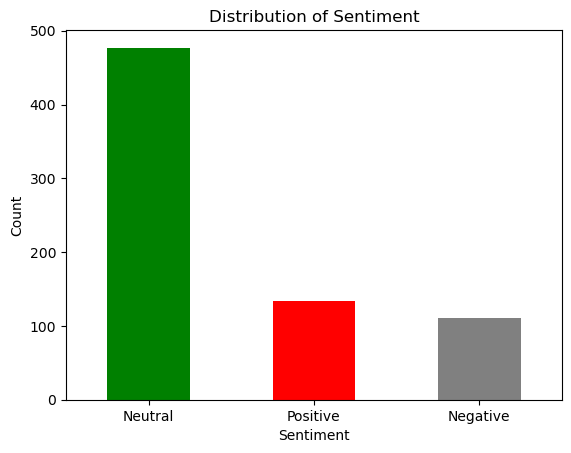

In [17]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_distribution = df['sentiment'].value_counts()

# Plot the distribution
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])  # Change colors as needed
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

## Text Summarization

In [18]:
import pandas as pd

# Group the data by 'track_title' and concatenate the lyrics
lyrics_concatenated = df.groupby('track_title')['lyric'].apply(lambda x: ' '.join(x)).reset_index()

# Merge the concatenated lyrics with the original DataFrame based on 'track_title'
df1 = pd.merge(df, lyrics_concatenated, on='track_title', how='left')

# Display the updated DataFrame
df1.head()

,album_name,track_title,track_n,lyric_x,line,clean_lyric,sentiment_score,sentiment,lyric_y
0,folklore (deluxe version),the 1,1,"I'm doing good, I'm on some new shit",1,im good im new shit,0.212121,Positive,"I'm doing good, I'm on some new shit Been sayi..."
1,folklore (deluxe version),the 1,1,"Been saying ""yes"" instead of ""no""",2,saying yes instead,0.000000,Neutral,"I'm doing good, I'm on some new shit Been sayi..."
2,folklore (deluxe version),the 1,1,"I thought I saw you at the bus stop, I didn't ...",3,thought saw bus stop didnt though,0.000000,Neutral,"I'm doing good, I'm on some new shit Been sayi..."
3,folklore (deluxe version),the 1,1,I hit the ground running each night,4,hit ground running night,0.000000,Neutral,"I'm doing good, I'm on some new shit Been sayi..."
4,folklore (deluxe version),the 1,1,I hit the Sunday matinée,5,hit sunday matinée,0.000000,Neutral,"I'm doing good, I'm on some new shit Been sayi..."


In [19]:
df1 = df1.rename(columns={'lyric_x': 'lyric', 'lyric_y': 'whole_lyrics'})
df1.head()

,album_name,track_title,track_n,lyric,line,clean_lyric,sentiment_score,sentiment,whole_lyrics
0,folklore (deluxe version),the 1,1,"I'm doing good, I'm on some new shit",1,im good im new shit,0.212121,Positive,"I'm doing good, I'm on some new shit Been sayi..."
1,folklore (deluxe version),the 1,1,"Been saying ""yes"" instead of ""no""",2,saying yes instead,0.000000,Neutral,"I'm doing good, I'm on some new shit Been sayi..."
2,folklore (deluxe version),the 1,1,"I thought I saw you at the bus stop, I didn't ...",3,thought saw bus stop didnt though,0.000000,Neutral,"I'm doing good, I'm on some new shit Been sayi..."
3,folklore (deluxe version),the 1,1,I hit the ground running each night,4,hit ground running night,0.000000,Neutral,"I'm doing good, I'm on some new shit Been sayi..."
4,folklore (deluxe version),the 1,1,I hit the Sunday matinée,5,hit sunday matinée,0.000000,Neutral,"I'm doing good, I'm on some new shit Been sayi..."


### We have multiple rows now containing the whole song lyrics, so we'll consider only 1 row of one song, for better text summarization.

In [20]:
df2=df1[["album_name","track_title","whole_lyrics"]]
df2

,album_name,track_title,whole_lyrics
0,folklore (deluxe version),the 1,"I'm doing good, I'm on some new shit Been sayi..."
1,folklore (deluxe version),the 1,"I'm doing good, I'm on some new shit Been sayi..."
2,folklore (deluxe version),the 1,"I'm doing good, I'm on some new shit Been sayi..."
3,folklore (deluxe version),the 1,"I'm doing good, I'm on some new shit Been sayi..."
4,folklore (deluxe version),the 1,"I'm doing good, I'm on some new shit Been sayi..."
...,...,...,...
717,folklore (deluxe version),​the lakes,Is it romantic how all my elegies eulogize me?...
718,folklore (deluxe version),​the lakes,Is it romantic how all my elegies eulogize me?...
719,folklore (deluxe version),​the lakes,Is it romantic how all my elegies eulogize me?...
720,folklore (deluxe version),​the lakes,Is it romantic how all my elegies eulogize me?...


In [21]:
df3 = df2.drop_duplicates(subset=['track_title'])

# Print the DataFrame with one row for each unique track title
df3.head()

,album_name,track_title,whole_lyrics
0,folklore (deluxe version),the 1,"I'm doing good, I'm on some new shit Been sayi..."
47,folklore (deluxe version),cardigan,"Vintage tee, brand new phone High heels on cob..."
103,folklore (deluxe version),​the last great american dynasty,"Rebekah rode up on the afternoon train, it was..."
143,folklore (deluxe version),​exile,"I can see you standing, honey With his arms ar..."
204,folklore (deluxe version),my tears ricochet,"We gather here, we line up, weepin' in a sunli..."


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 0 to 694
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   album_name    17 non-null     object
 1   track_title   17 non-null     object
 2   whole_lyrics  17 non-null     object
dtypes: object(3)
memory usage: 544.0+ bytes


## NER

In [23]:
import spacy
import pandas as pd

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to apply NER to text
def apply_ner(text):
    doc = nlp(text)
    ner_tags = [(ent.text, ent.label_) for ent in doc.ents]
    return ner_tags

# Apply NER to the whole_lyrics column using .loc
df3.loc[:, 'ner_tags'] = df3['whole_lyrics'].apply(apply_ner)

# Print the DataFrame with NER tags
df3[['track_title', 'ner_tags']]
df3

C:\Users\Sai\AppData\Local\Temp\ipykernel_532\557007669.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'ner_tags'] = df3['whole_lyrics'].apply(apply_ner)


,album_name,track_title,whole_lyrics,ner_tags
0,folklore (deluxe version),the 1,"I'm doing good, I'm on some new shit Been sayi...","[(Sunday, DATE), (another day, DATE), (today, ..."
47,folklore (deluxe version),cardigan,"Vintage tee, brand new phone High heels on cob...","[(Sequin, PERSON), (Dancin, PERSON), (Levi, PE..."
103,folklore (deluxe version),​the last great american dynasty,"Rebekah rode up on the afternoon train, it was...","[(afternoon, TIME), (St. Louis Bill, GPE), (St..."
143,folklore (deluxe version),​exile,"I can see you standing, honey With his arms ar...","[(Laughin, ORG), (five whole minutes, TIME), (..."
204,folklore (deluxe version),my tears ricochet,"We gather here, we line up, weepin' in a sunli...","[(my worst day, DATE), (Til, PERSON), (night, ..."
241,folklore (deluxe version),​mirrorball,I want you to know I'm a mirrorball I'll show ...,"[(million, CARDINAL), (Hush, PERSON), (Hush, P..."
280,folklore (deluxe version),seven,Please picture me in the trees I hit my peak a...,"[(seven Feet, QUANTITY), (Pennsylvania, GPE), ..."
317,folklore (deluxe version),august,"Salt air, and the rust on your door I never ne...","[(August, DATE), (August, DATE), (August, DATE..."
368,folklore (deluxe version),this is me trying,I've been having a hard time adjusting I had t...,"[(Post-Chorus, ORG), (these days, DATE), (one,..."
397,folklore (deluxe version),​illicit affairs,Make sure nobody sees you leave Hood over your...,"[(Hood, PRODUCT), (one, CARDINAL), (A million,..."


In [24]:
# Example manual correction function
def correct_ner(ner_tags):
    corrected_tags = []
    for text, label in ner_tags:
        if label == 'PERSON' and {text.endswith('ing') or text.endswith('in')}:
            corrected_tags.append((text, 'VERB'))  # Correct person entity to verb
        else:
            corrected_tags.append((text, label))
    return corrected_tags

# Apply NER to the whole_lyrics column using .loc
df3.loc[:, 'ner_tags'] = df3['whole_lyrics'].apply(apply_ner)

# Manually correct NER results using .loc
df3.loc[:, 'corrected_ner_tags'] = df3['ner_tags'].apply(correct_ner)

# Print the DataFrame with corrected NER tags
df3[['track_title', 'corrected_ner_tags']]



C:\Users\Sai\AppData\Local\Temp\ipykernel_532\3454896145.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'corrected_ner_tags'] = df3['ner_tags'].apply(correct_ner)


,track_title,corrected_ner_tags
0,the 1,"[(Sunday, DATE), (another day, DATE), (today, ..."
47,cardigan,"[(Sequin, VERB), (Dancin, VERB), (Levi, VERB),..."
103,​the last great american dynasty,"[(afternoon, TIME), (St. Louis Bill, GPE), (St..."
143,​exile,"[(Laughin, ORG), (five whole minutes, TIME), (..."
204,my tears ricochet,"[(my worst day, DATE), (Til, VERB), (night, TI..."
241,​mirrorball,"[(million, CARDINAL), (Hush, VERB), (Hush, VER..."
280,seven,"[(seven Feet, QUANTITY), (Pennsylvania, GPE), ..."
317,august,"[(August, DATE), (August, DATE), (August, DATE..."
368,this is me trying,"[(Post-Chorus, ORG), (these days, DATE), (one,..."
397,​illicit affairs,"[(Hood, PRODUCT), (one, CARDINAL), (A million,..."


In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 0 to 694
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   album_name          17 non-null     object
 1   track_title         17 non-null     object
 2   whole_lyrics        17 non-null     object
 3   ner_tags            17 non-null     object
 4   corrected_ner_tags  17 non-null     object
dtypes: object(5)
memory usage: 816.0+ bytes


### Summarizing

In [24]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from heapq import nlargest

# Function to summarize text
def summarize_text(text, num_sentences=2):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    
    # Remove stopwords (common words that do not carry much meaning)
    stop_words = set(stopwords.words('english'))
    word_freq = FreqDist(word for word in nltk.word_tokenize(text.lower()) if word not in stop_words)
    
    # Calculate sentence scores based on word frequency
    sentence_scores = {sentence: sum(word_freq[word] for word in nltk.word_tokenize(sentence.lower()) if word not in stop_words) for sentence in sentences}
    
    # Select top 'num_sentences' sentences with highest scores
    summary_sentences = nlargest(num_sentences, sentence_scores, key=sentence_scores.get)
    
    # Join the selected sentences to form the summary
    summary = ' '.join(summary_sentences)
    
    return summary

a = df3['whole_lyrics']

# Iterate over each row in the column and summarize the text
for text in a:
    # Print the original text
    print("Original Text:")
    print(text)
    
    # Summarize the text
    summarized_text = summarize_text(text)
    print("\nSummarized Text:")
    print(summarized_text)
    print("\n")

Original Text:
I'm doing good, I'm on some new shit Been saying "yes" instead of "no" I thought I saw you at the bus stop, I didn't though I hit the ground running each night I hit the Sunday matinée You know the greatest films of all time were never made I guess you never know, never know And if you wanted me, you really should've showed And if you never bleed, you're never gonna grow And it's alright now But we were something, don't you think so? Roaring twenties, tossing pennies in the pool And if my wishes came true It would've been you In my defense, I have none For never leaving well enough alone But it would've been fun If you would've been the one (Ooh) I have this dream you're doing cool shit Having adventures on your own You meet some woman on the internet and take her home We never painted by the numbers, baby But we were making it count You know the greatest loves of all time are over now I guess you never know, never know And it's another day waking up alone But we were so

In [25]:
df3['summary'] = df3['whole_lyrics'].apply(summarize_text)

C:\Users\Sai\AppData\Local\Temp\ipykernel_14392\1414949568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['summary'] = df3['whole_lyrics'].apply(summarize_text)


,album_name,track_title,whole_lyrics,summary
0,folklore (deluxe version),the 1,"I'm doing good, I'm on some new shit Been sayi...","Roaring twenties, tossing pennies in the pool ..."
47,folklore (deluxe version),cardigan,"Vintage tee, brand new phone High heels on cob...","Vintage tee, brand new phone High heels on cob..."
103,folklore (deluxe version),​the last great american dynasty,"Rebekah rode up on the afternoon train, it was...","The wedding was charming, if a little gauche T..."
143,folklore (deluxe version),​exile,"I can see you standing, honey With his arms ar...","You were my town, now I'm in exile, seein' you..."
204,folklore (deluxe version),my tears ricochet,"We gather here, we line up, weepin' in a sunli...","Cursing my name, wishing I stayed Look at how ..."
241,folklore (deluxe version),​mirrorball,I want you to know I'm a mirrorball I'll show ...,I want you to know I'm a mirrorball I'll show ...
280,folklore (deluxe version),seven,Please picture me in the trees I hit my peak a...,"Sweet tea in the summer Cross your heart, won'..."
317,folklore (deluxe version),august,"Salt air, and the rust on your door I never ne...",I remember thinkin' I had you But I can see us...
368,folklore (deluxe version),this is me trying,I've been having a hard time adjusting I had t...,I've been having a hard time adjusting I had t...
397,folklore (deluxe version),​illicit affairs,Make sure nobody sees you leave Hood over your...,Make sure nobody sees you leave Hood over your...


In [27]:
pip install rouge

  Obtaining dependency information for rouge from https://files.pythonhosted.org/packages/32/7c/650ae86f92460e9e8ef969cc5008b24798dcf56a9a8947d04c78f550b3f5/rouge-1.0.1-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [28]:
from rouge import Rouge

# Initialize ROUGE
rouge = Rouge()

# Assuming 'df' is your DataFrame and 'a' is the column containing the original text,
# and 'summary' is the column containing the generated summaries
original_texts = df3['whole_lyrics']
generated_summaries = df3['summary']

# Calculate ROUGE scores
scores = rouge.get_scores(generated_summaries, original_texts, avg=True)

# Print ROUGE scores
print("ROUGE Scores:")
print(scores)

ROUGE Scores:
{'rouge-1': {'r': 0.8781360637909184, 'p': 1.0, 'f': 0.9298678076325333}, 'rouge-2': {'r': 0.8526414005099724, 'p': 0.9964068008557537, 'f': 0.9117498576511556}, 'rouge-l': {'r': 0.7643461299089449, 'p': 0.855329395177285, 'f': 0.802871528252481}}


## Text Summary Evaluation 

#### rouge-1: This refers to ROUGE-N, where N represents the length of n-grams. In this case, 'rouge-1' represents unigram overlap. The scores are:
###### r (recall): 0.8781360637909184 -
    This indicates that 87.81% of unigrams in the reference summaries are present in the generated summaries.
###### p (precision): 1.0 -
    This indicates that 100% of the unigrams in the generated summaries are present in the reference summaries.
###### f (F1-score): 0.9298678076325333 -
    This is the harmonic mean of recall and precision, representing overall performance. It is computed as 2 * (precision * recall) / (precision + recall).
    
#### rouge-2: This refers to ROUGE-N with N=2, representing bigram overlap. The scores are:

###### r (recall): 0.8526414005099724 - 
    Similar to 'rouge-1', but for bigrams.
###### p (precision): 0.9964068008557537 -
    Similar to 'rouge-1', but for bigrams.
###### f (F1-score): 0.9117498576511556 -
    Similar to 'rouge-1', but for bigrams.

#### rouge-l: This refers to ROUGE-L, which measures the longest common subsequence between the reference and generated summaries. The scores are:

##### r (recall): 0.7643461299089449 -
    This indicates that 76.43% of the longest common subsequences in the reference summaries are present in the generated summaries.
###### p (precision): 0.855329395177285 -
    This indicates that 85.53% of the longest common subsequences in the generated summaries are present in the reference summaries.
###### f (F1-score): 0.802871528252481 -
    This is the harmonic mean of recall and precision, representing overall performance for ROUGE-L.

#### In summary, higher ROUGE scores indicate better agreement between the generated summaries and reference summaries. ROUGE-N measures overlap based on n-grams, while ROUGE-L measures overlap based on the longest common subsequence.